In [4]:
#IMPORTING NECCESARAY LIBARARYS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression

In [5]:
#READ THE DATA SET
df=pd.read_csv("/content/fetal_health.csv")
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df.tail()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
2121,140.0,0.000,0.000,0.007,0.0,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.0,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.0,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.0,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0
2125,142.0,0.002,0.002,0.008,0.0,0.0,0.0,74.0,0.4,36.0,...,117.0,159.0,2.0,1.0,145.0,143.0,145.0,1.0,0.0,1.0


**THERE ARE 2,125 ROWS IN A GIVEN DATA SET**

---->> SANITY CHECK OF DATA (i.e, shape of data set)

In [8]:
df.shape

(2126, 22)

*sucessfully fetch data* ...!!! ( 2,126 ROWS ) AND (22 COLUMNS)

                                  -

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

**INFORMATION ABOUT DATA SET  succesfully completed ...**

In [10]:
#FINDING THE MISSING VALUES
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

**NO MISSING VALUES IN DATA SET**

In [11]:
# FINDING MISSING VALUES IN PERCENTAGE %
df.isnull().sum()/df.shape[0]*100

baseline value                                            0.0
accelerations                                             0.0
fetal_movement                                            0.0
uterine_contractions                                      0.0
light_decelerations                                       0.0
severe_decelerations                                      0.0
prolongued_decelerations                                  0.0
abnormal_short_term_variability                           0.0
mean_value_of_short_term_variability                      0.0
percentage_of_time_with_abnormal_long_term_variability    0.0
mean_value_of_long_term_variability                       0.0
histogram_width                                           0.0
histogram_min                                             0.0
histogram_max                                             0.0
histogram_number_of_peaks                                 0.0
histogram_number_of_zeroes                                0.0
histogra

In [12]:
#CHECKING THE DUPLICATE VALUES
df.duplicated().sum()

13

**Oops..!   THERE ARE 13 DUPLICATE VALUES EXISTED....**

In [13]:
# DESCRIPTIVE FUNCTION
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


**DISCRPITIVE TRANSPOSE INDEX AND COLUMNS**

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


In [15]:
df['fetal_health']=df['fetal_health'].astype('int')

--> **HERE TARGET COLUNM CHANGED DATATYPE AS INT**

In [16]:
df['fetal_health'].value_counts()

fetal_health
1    1655
2     295
3     176
Name: count, dtype: int64

In [17]:
# CHECKING COLUMNS
df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

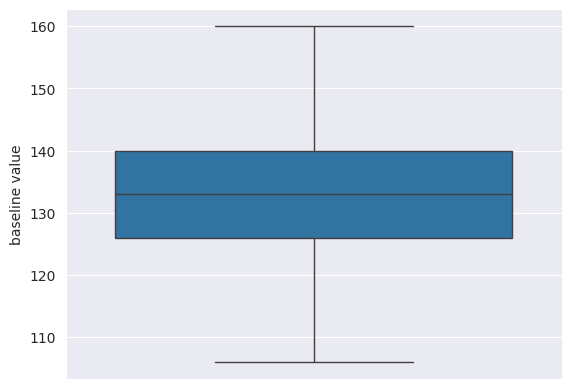

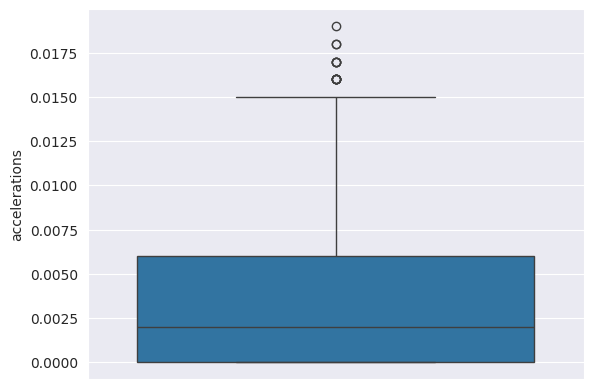

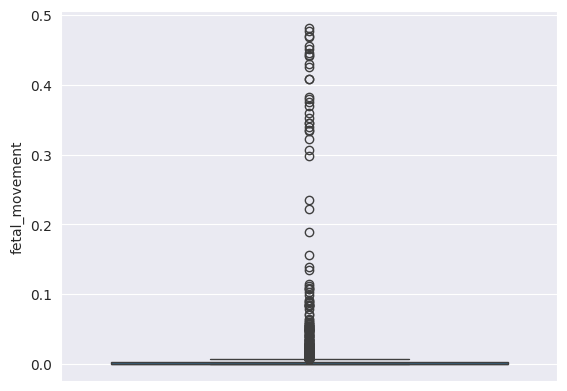

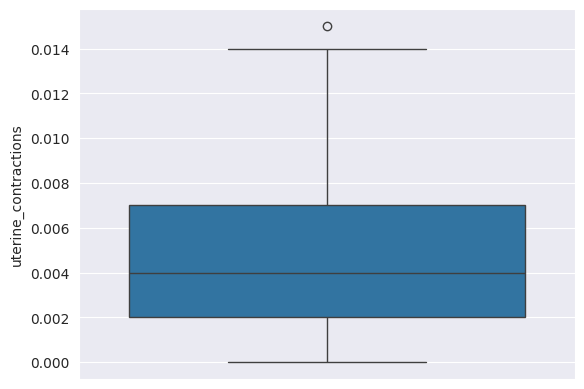

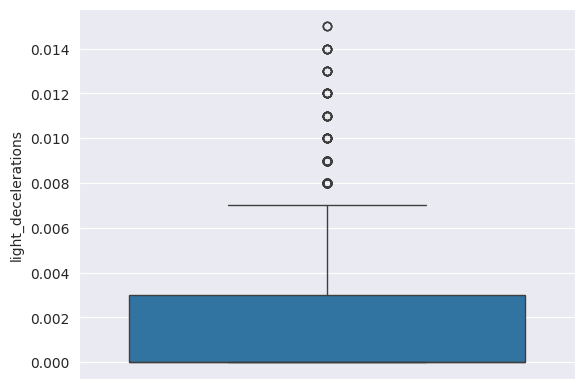

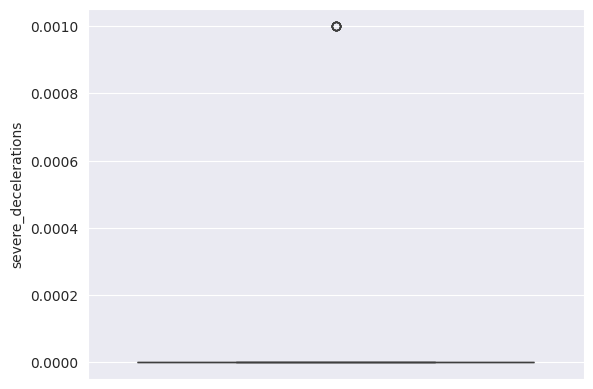

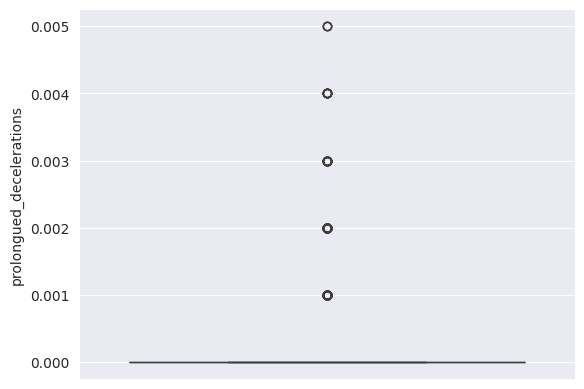

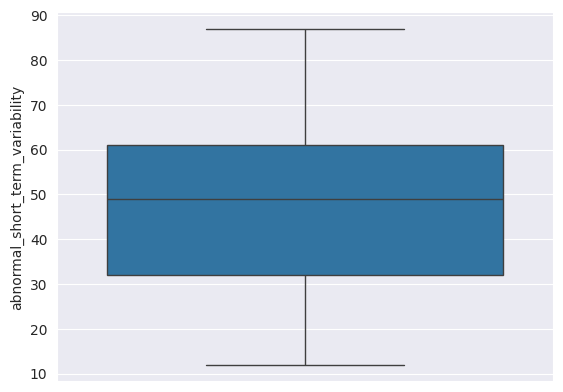

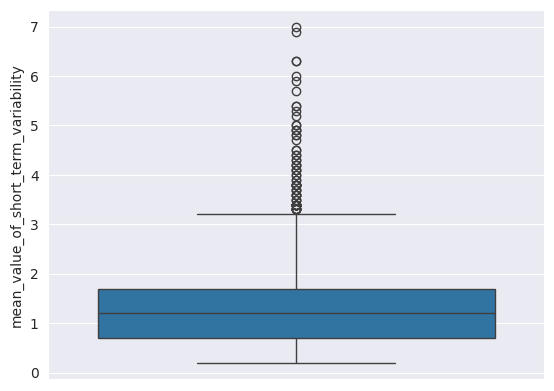

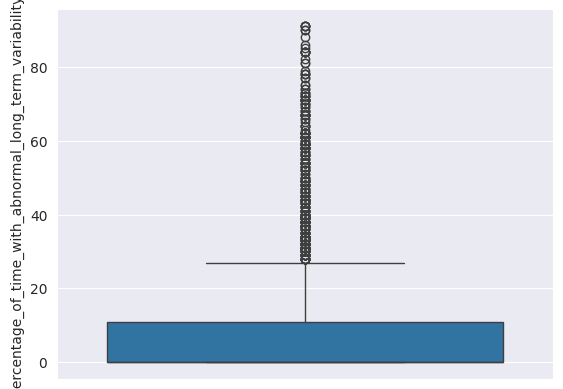

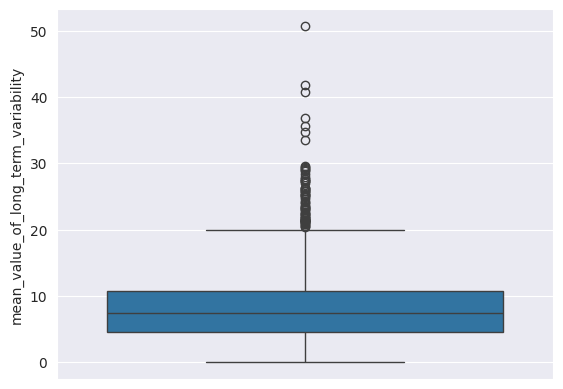

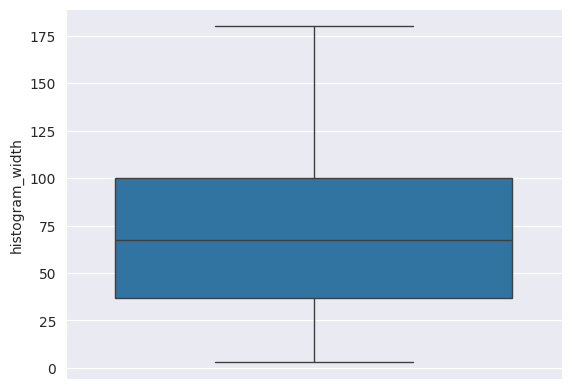

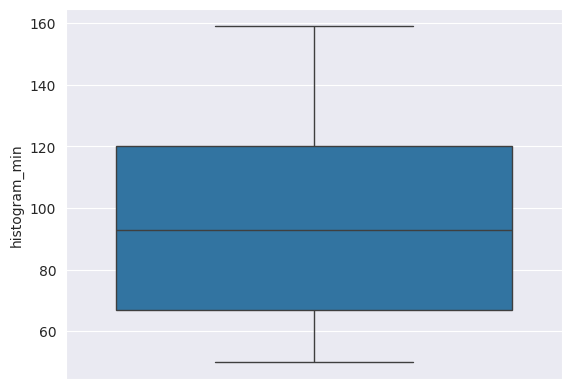

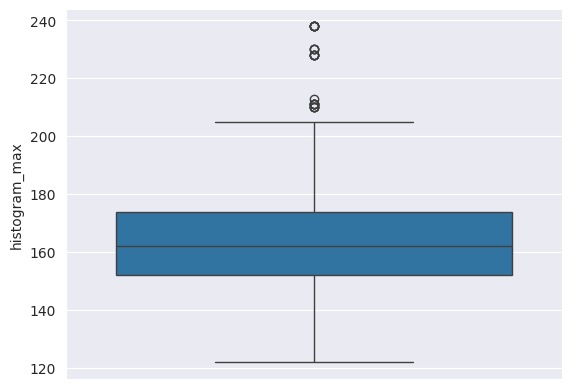

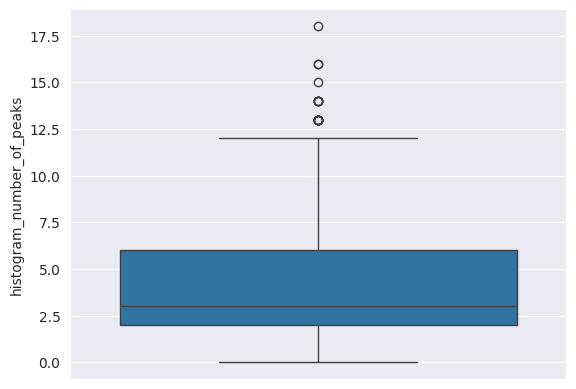

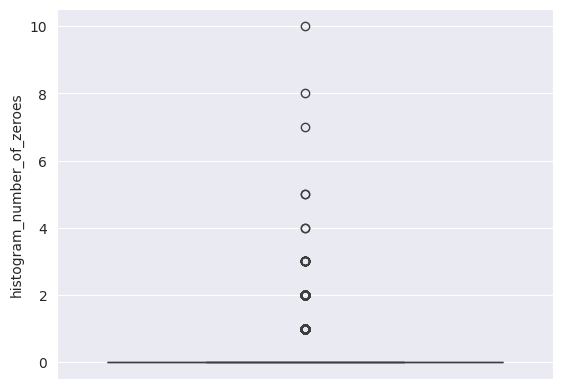

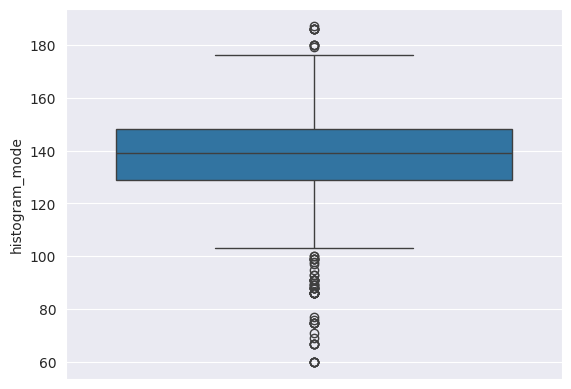

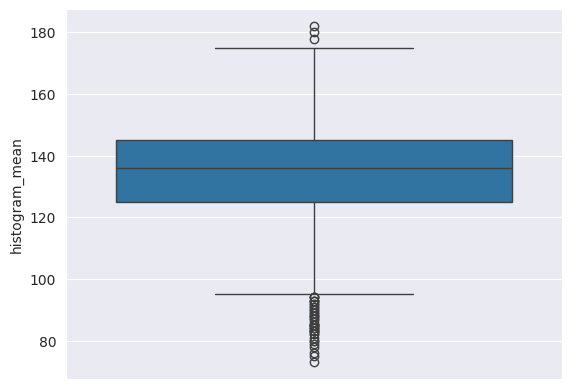

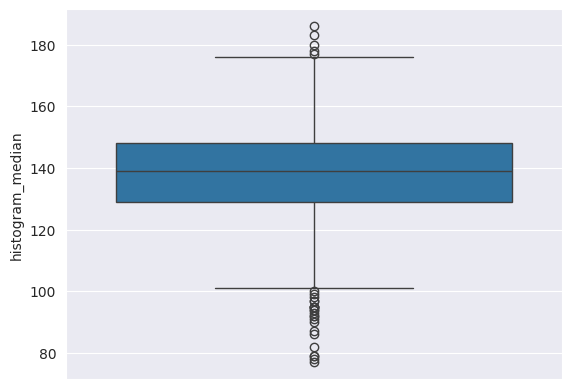

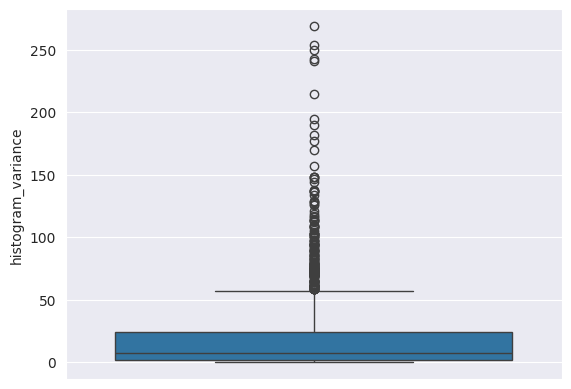

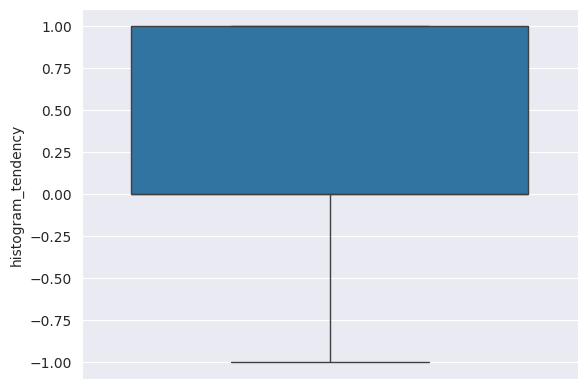

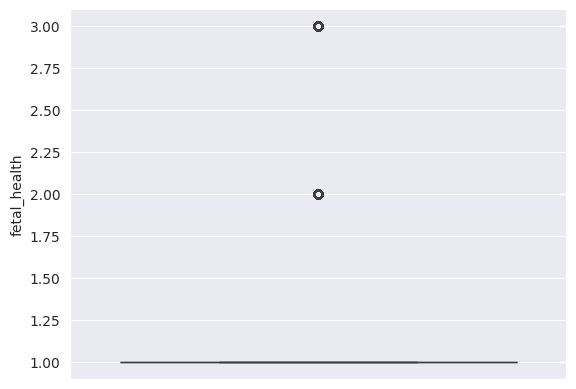

In [18]:
for i in df.select_dtypes(include=['int64','float64']).columns:
    sns.boxplot(df[i])
    plt.show()

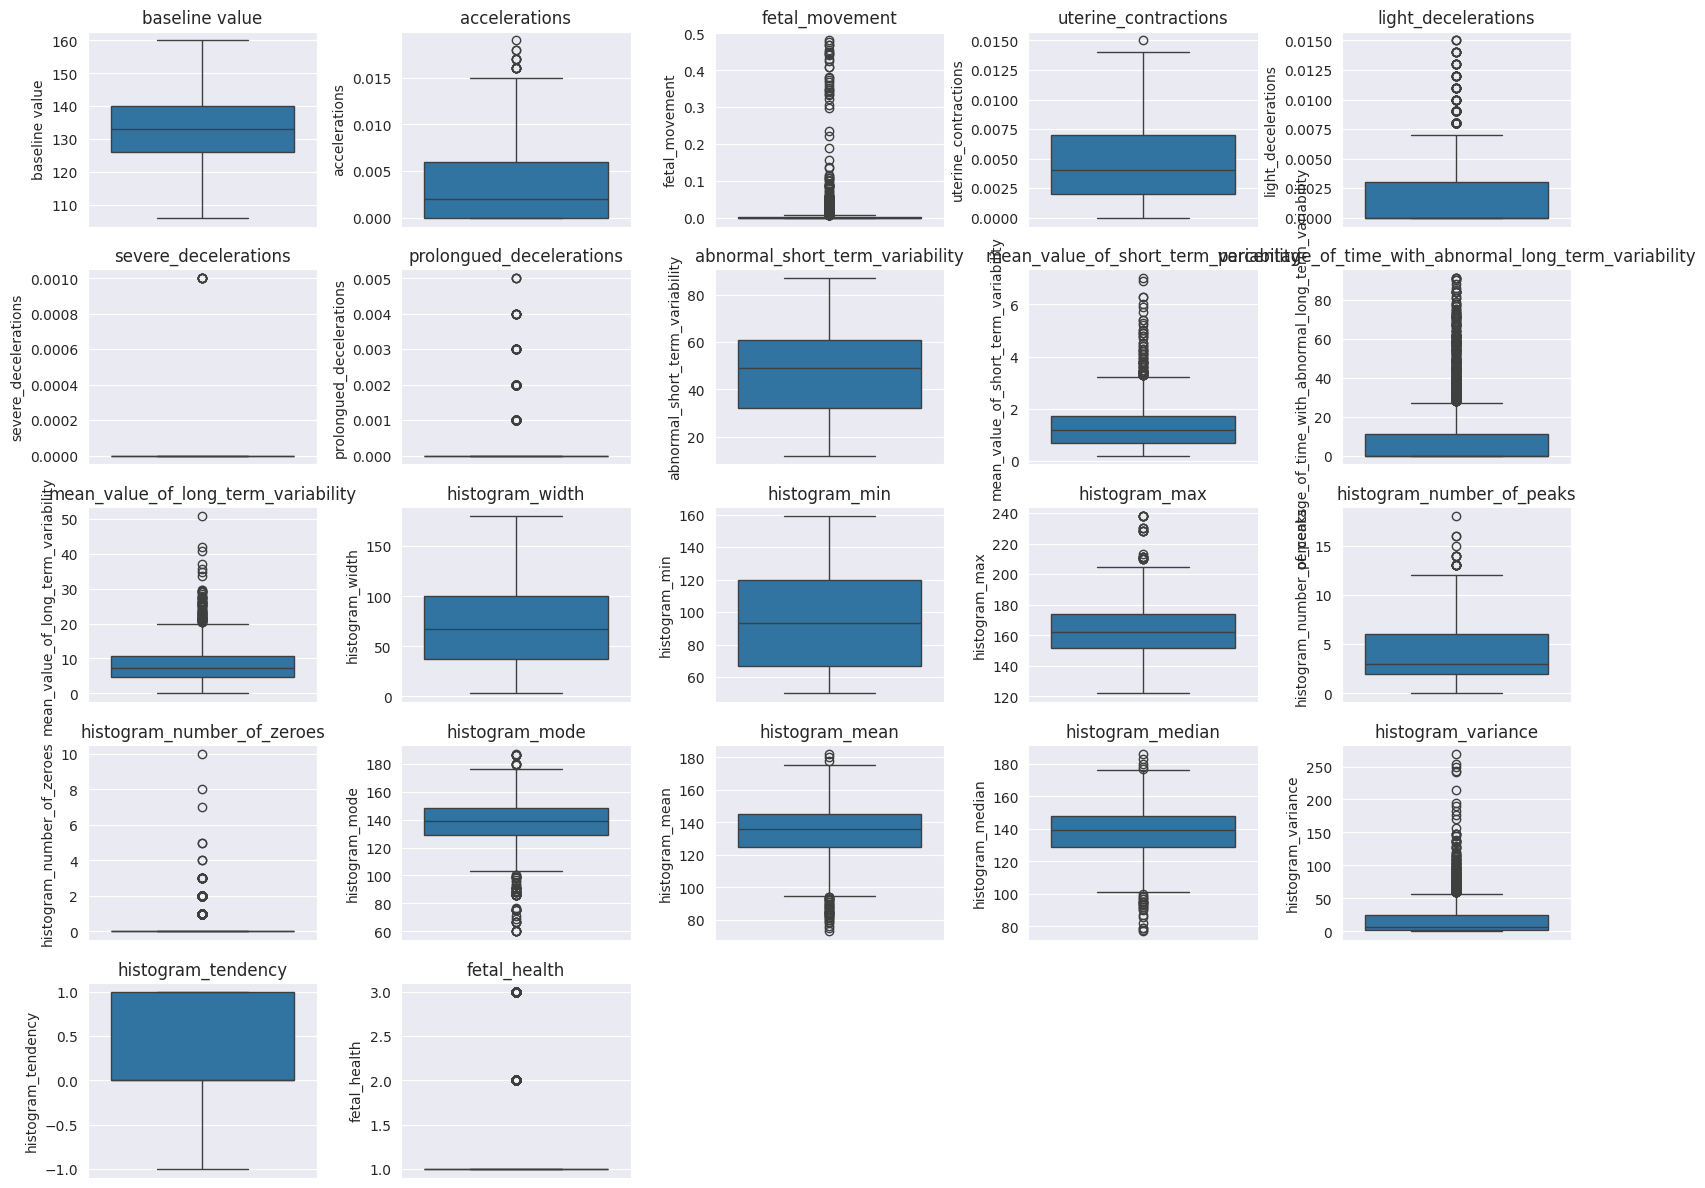

In [19]:
# PRINING THE MAX OUTLIERS
plt.figure(figsize=(16, 12))
for i, column in enumerate(df.columns, 1):
    plt.subplot(5, 5, i)
    sns.boxplot(df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

In [20]:
# Calculate Q1 and Q3 for all columns
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
df_filtered = df[~((df < lower_limit) | (df > upper_limit)).any(axis=1)]

#**Printing boxplots for the filtered DataFrame**

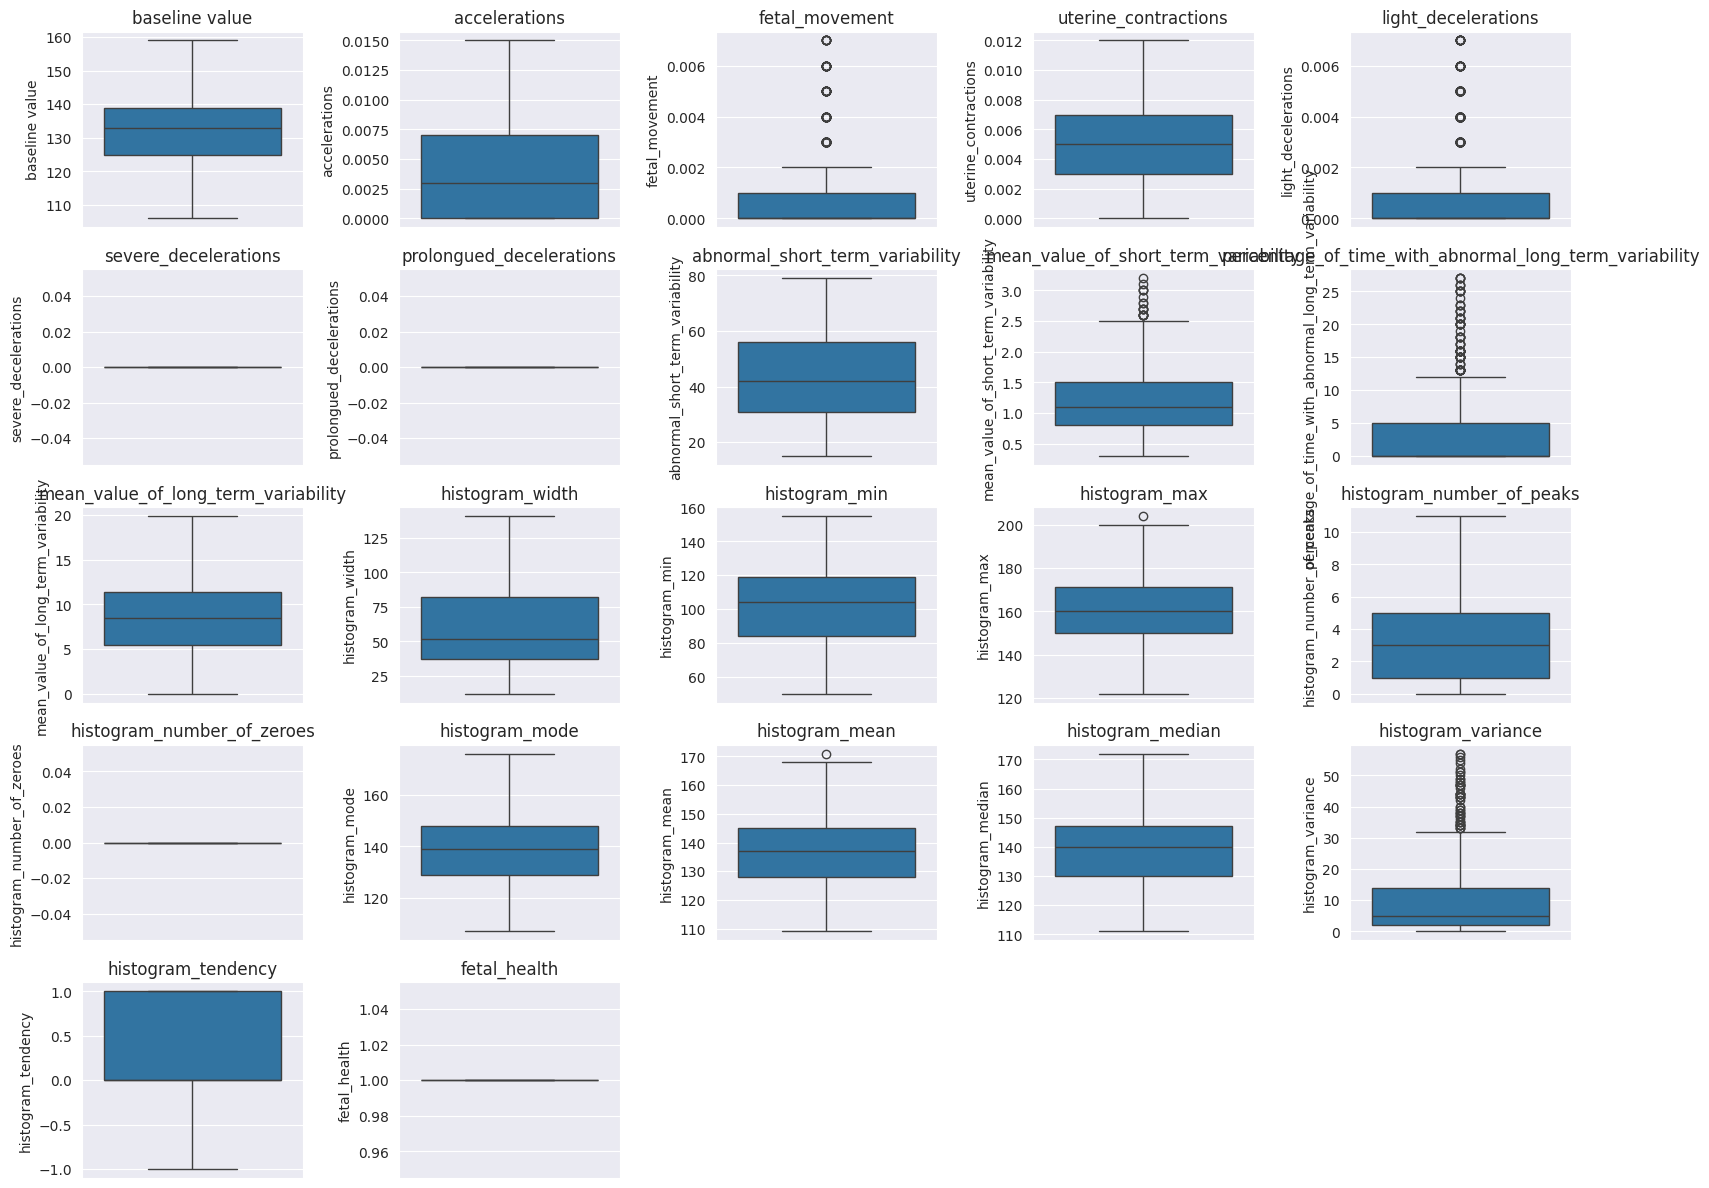

In [21]:
plt.figure(figsize=(16, 12))
for i, column in enumerate(df_filtered.columns, 1):
    plt.subplot(5, 5, i)
    sns.boxplot(df_filtered[column])
    plt.title(column)
plt.tight_layout()
plt.show()


**Visualizing Data**

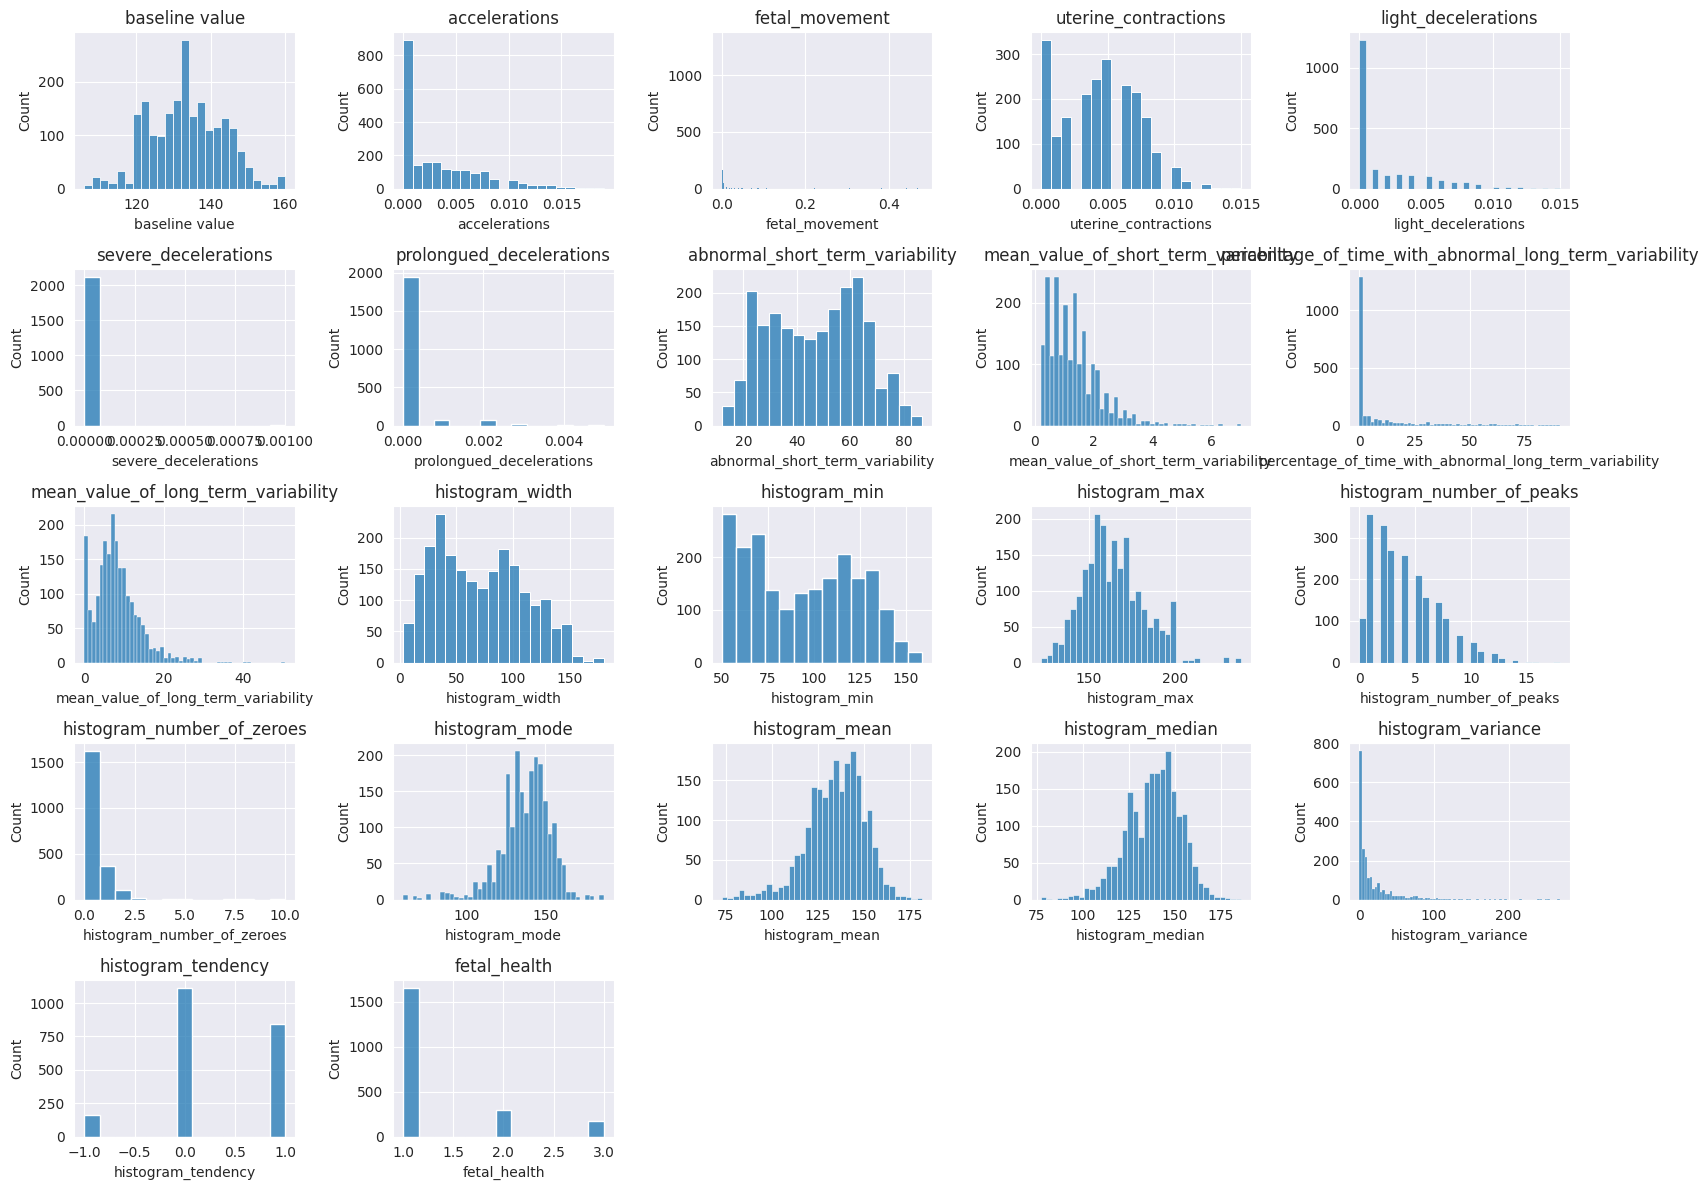

In [22]:
plt.figure(figsize=(16, 12))
for i, column in enumerate(df.columns, 1):
    plt.subplot(5, 5, i)
    sns.histplot(df[column], kde=False,)
    plt.title(column)
plt.tight_layout()
plt.show()

----->>  *successfilly visualizied  data......*

## Heat Map

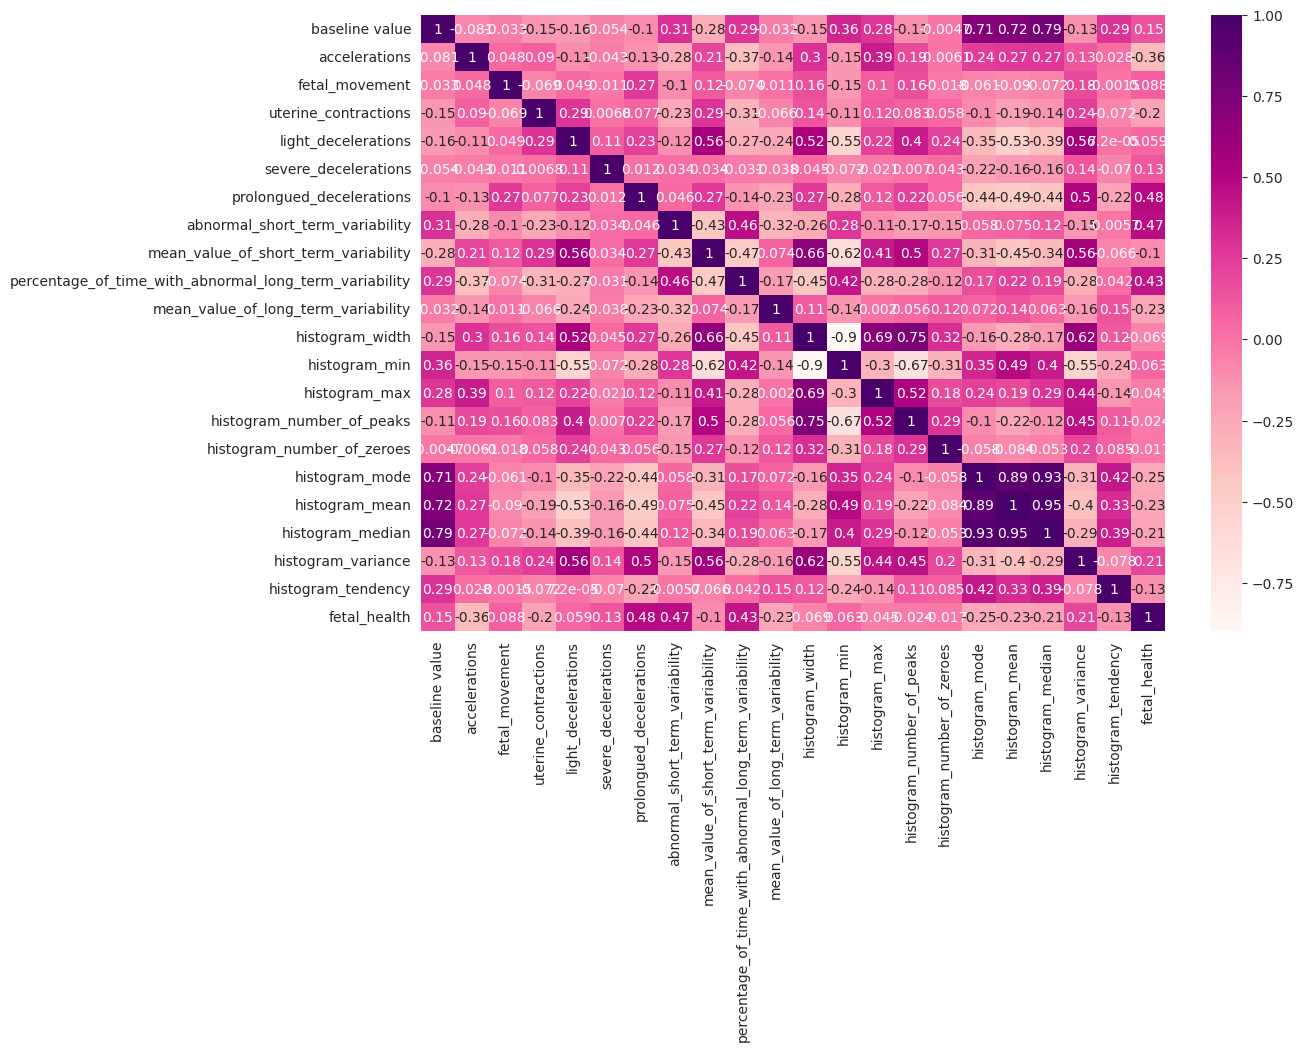

In [23]:
# generate heatmap to display correlations in data
corr = df.corr()
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="RdPu");

**splitting data into train and test**

In [24]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


In [25]:
from sklearn.model_selection import train_test_split
x = df.drop('fetal_health', axis=1)  # Replace 'target_variable' with your actual column name
y = df['fetal_health']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
x_train.shape,x_test.shape

((1700, 21), (426, 21))

In [26]:
pip install imblearn

In [27]:
y_train.shape,y_test.shape


((1700,), (426,))

In [28]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
print(y_train.unique())
# Check the number of unique classes in y_train
print("Number of unique classes in y_train:", len(y_train.unique()))
if len(y_train.unique()) > 1:
    x_train_smote,y_train_smote=smote.fit_resample(x_train.astype('float'),y_train)
else:
    print("SMOTE cannot be applied: y_train contains only one class.")

[1 2 3]
Number of unique classes in y_train: 3


In [29]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
print(y_train.unique())
x_train_smote,y_train_smote=smote.fit_resample(x_train.astype('float'),y_train)

[1 2 3]


In [30]:
from collections import Counter
print("before smote :",Counter(y_train))
print("after smote :",Counter(y_train_smote))

before smote : Counter({1: 1329, 2: 237, 3: 134})
after smote : Counter({1: 1329, 2: 1329, 3: 1329})


**Model Building**

**Random Forest**

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rf=RandomForestClassifier()
rf.fit(x_train_smote,y_train_smote)

RandomForestClassifier()

**Accuracry Score of Random Forest**

In [33]:
pred=rf.predict(x_test)
print("accuracy score")
print(accuracy_score(y_test,pred))
print("\n")
print("confusion matrix")
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

accuracy score
0.9413145539906104


confusion matrix
              precision    recall  f1-score   support

           1       0.97      0.97      0.97       326
           2       0.83      0.78      0.80        58
           3       0.89      0.95      0.92        42

    accuracy                           0.94       426
   macro avg       0.90      0.90      0.90       426
weighted avg       0.94      0.94      0.94       426

[[316   7   3]
 [ 11  45   2]
 [  0   2  40]]


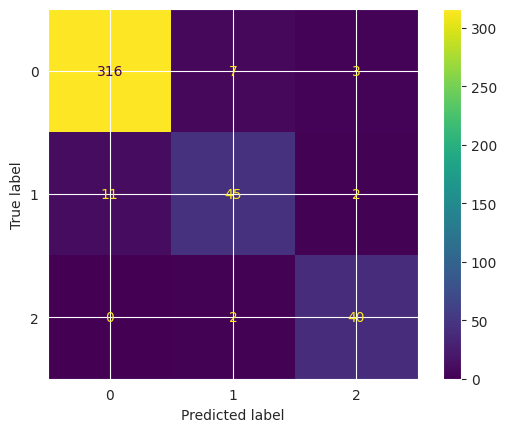

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(y_test,pred)
cm_display=ConfusionMatrixDisplay(cm).plot()
plt.show()

**Decision Tree**

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
dt=DecisionTreeClassifier()
dt.fit(x_train_smote,y_train_smote)
pred=dt.predict(x_test)
print("accuracy score")
print(accuracy_score(y_test,pred))
print("\n")
print("confusion matrix")
print(classification_report(y_test,pred))

accuracy score
0.9248826291079812


confusion matrix
              precision    recall  f1-score   support

           1       0.96      0.95      0.96       326
           2       0.74      0.79      0.77        58
           3       0.95      0.88      0.91        42

    accuracy                           0.92       426
   macro avg       0.88      0.88      0.88       426
weighted avg       0.93      0.92      0.93       426



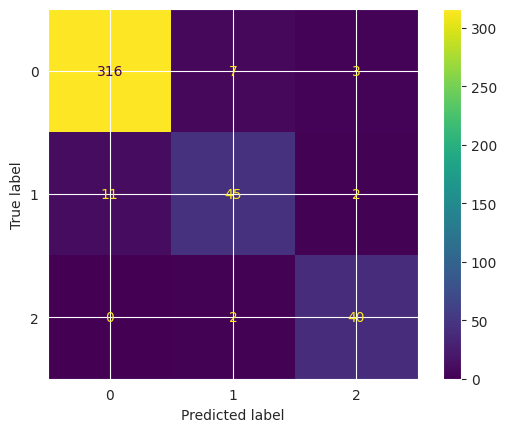

In [37]:
cm_display=ConfusionMatrixDisplay(cm).plot()
plt.show()

**Logistic Regression**

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
lr=LogisticRegression()
lr.fit(x_train_smote,y_train_smote)
pred=lr.predict(x_test)
print("accuracy score")
print(accuracy_score(y_test,pred))
print("\n")
print("confusion matrix")
print(classification_report(y_test,pred))

accuracy score
0.7511737089201878


confusion matrix
              precision    recall  f1-score   support

           1       0.94      0.76      0.84       326
           2       0.36      0.66      0.46        58
           3       0.62      0.81      0.70        42

    accuracy                           0.75       426
   macro avg       0.64      0.74      0.67       426
weighted avg       0.83      0.75      0.78       426



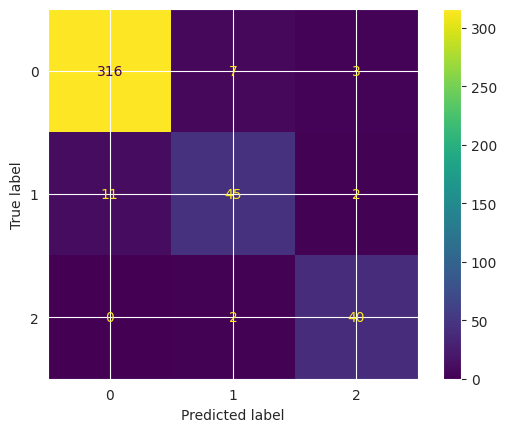

In [40]:
cm_display=ConfusionMatrixDisplay(cm).plot()
plt.show()

**k-Nearest Neighbors**

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_smote,y_train_smote)
pred=knn.predict(x_test)
print("accuracy score")
print(accuracy_score(y_test,pred))
print("\n")
print("confusion matrix")
print(classification_report(y_test,pred))

accuracy score
0.8427230046948356


confusion matrix
              precision    recall  f1-score   support

           1       0.96      0.86      0.90       326
           2       0.49      0.79      0.61        58
           3       0.82      0.79      0.80        42

    accuracy                           0.84       426
   macro avg       0.76      0.81      0.77       426
weighted avg       0.88      0.84      0.85       426



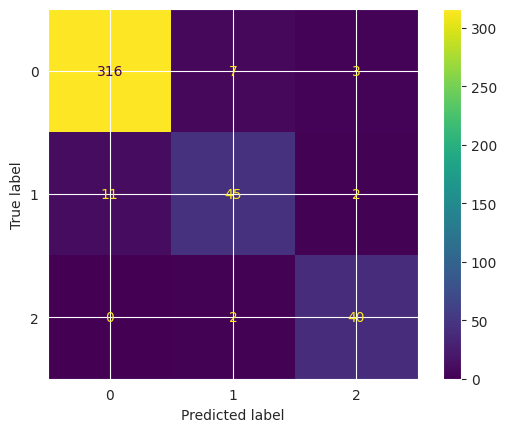

In [43]:
cm_display=ConfusionMatrixDisplay(cm).plot()
plt.show()

**Testing The Model**

In [44]:
test_data = [[120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,0,43.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0]]  # Fill in the missing values
predictions = rf.predict(test_data)
print(predictions)

[1]


In [45]:
test_data=[[134.0	,0.003	,0.000	,0.008,	0.003,	0.0	,0.0	,16.0	,2.4,	0.0	,0,53.0	,170.0	,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0]]
pred=rf.predict(test_data)
print(pred)

[1]


**Deployment**

In [46]:
import pickle
pickle.dump(knn,open('fetal_health3.pkl','wb'))